In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from fast_inference import PSPNetFastApplier
from os.path import join

In [2]:
images_path = '/sly_task_data/data/' # it could be one image or directory with several images

In [3]:
# inference params
settings = {
  "device_id": 0,
  "gpu_devices": [
    0
  ],
  "model_classes": {
    "save_classes": "__all__",
    "add_suffix": "_pspnet"
  },
  "existing_objects": {
    "save_classes": [],
    "add_suffix": ""
  },
  "mode": {
    "source": "full_image"
  }
}

In [4]:
applier = PSPNetFastApplier(settings)

{"message": "Will init all required to inference.", "timestamp": "2018-10-04T13:22:58.014Z", "level": "info"}
{"message": "Model input size is read (for auto-rescale).", "input_size": {"width": 713, "height": 713}, "timestamp": "2018-10-04T13:22:58.022Z", "level": "info"}
{"message": "Read model internal class mapping", "class_mapping": {"wall": 0, "building;edifice": 1, "sky": 2, "floor;flooring": 3, "tree": 4, "ceiling": 5, "road;route": 6, "bed": 7, "windowpane;window": 8, "grass": 9, "cabinet": 10, "sidewalk;pavement": 11, "person;individual;someone;somebody;mortal;soul": 12, "earth;ground": 13, "door;double;door": 14, "table": 15, "mountain;mount": 16, "plant;flora;plant;life": 17, "curtain;drape;drapery;mantle;pall": 18, "chair": 19, "car;auto;automobile;machine;motorcar": 20, "water": 21, "painting;picture": 22, "sofa;couch;lounge": 23, "shelf": 24, "house": 25, "sea": 26, "mirror": 27, "rug;carpet;carpeting": 28, "field": 29, "armchair": 30, "seat": 31, "fence;fencing": 32, "de

{"message": "Will create model.", "timestamp": "2018-10-04T13:22:58.029Z", "level": "info"}
{"message": "Will load weights from trained model.", "timestamp": "2018-10-04T13:22:59.164Z", "level": "info"}


INFO:tensorflow:Restoring parameters from /sly_task_data/model/model.ckpt


{"message": "Model has been created & weights are loaded.", "timestamp": "2018-10-04T13:23:01.220Z", "level": "info"}
{"message": "Model is ready to inference.", "timestamp": "2018-10-04T13:23:01.221Z", "level": "info"}


In [5]:
def get_imgs_list(path):
    if os.path.isdir(path):
        imgs_list = [join(path, fp) for fp in os.listdir(path)]
    else:
        imgs_list = [path]
    return imgs_list

In [6]:
# Get images list
imgs_list = get_imgs_list(images_path)

In [7]:
color_mapping = dict()
for cls in applier.train_classes._classes_lst:
    color_mapping[cls['title']] = cls['color']

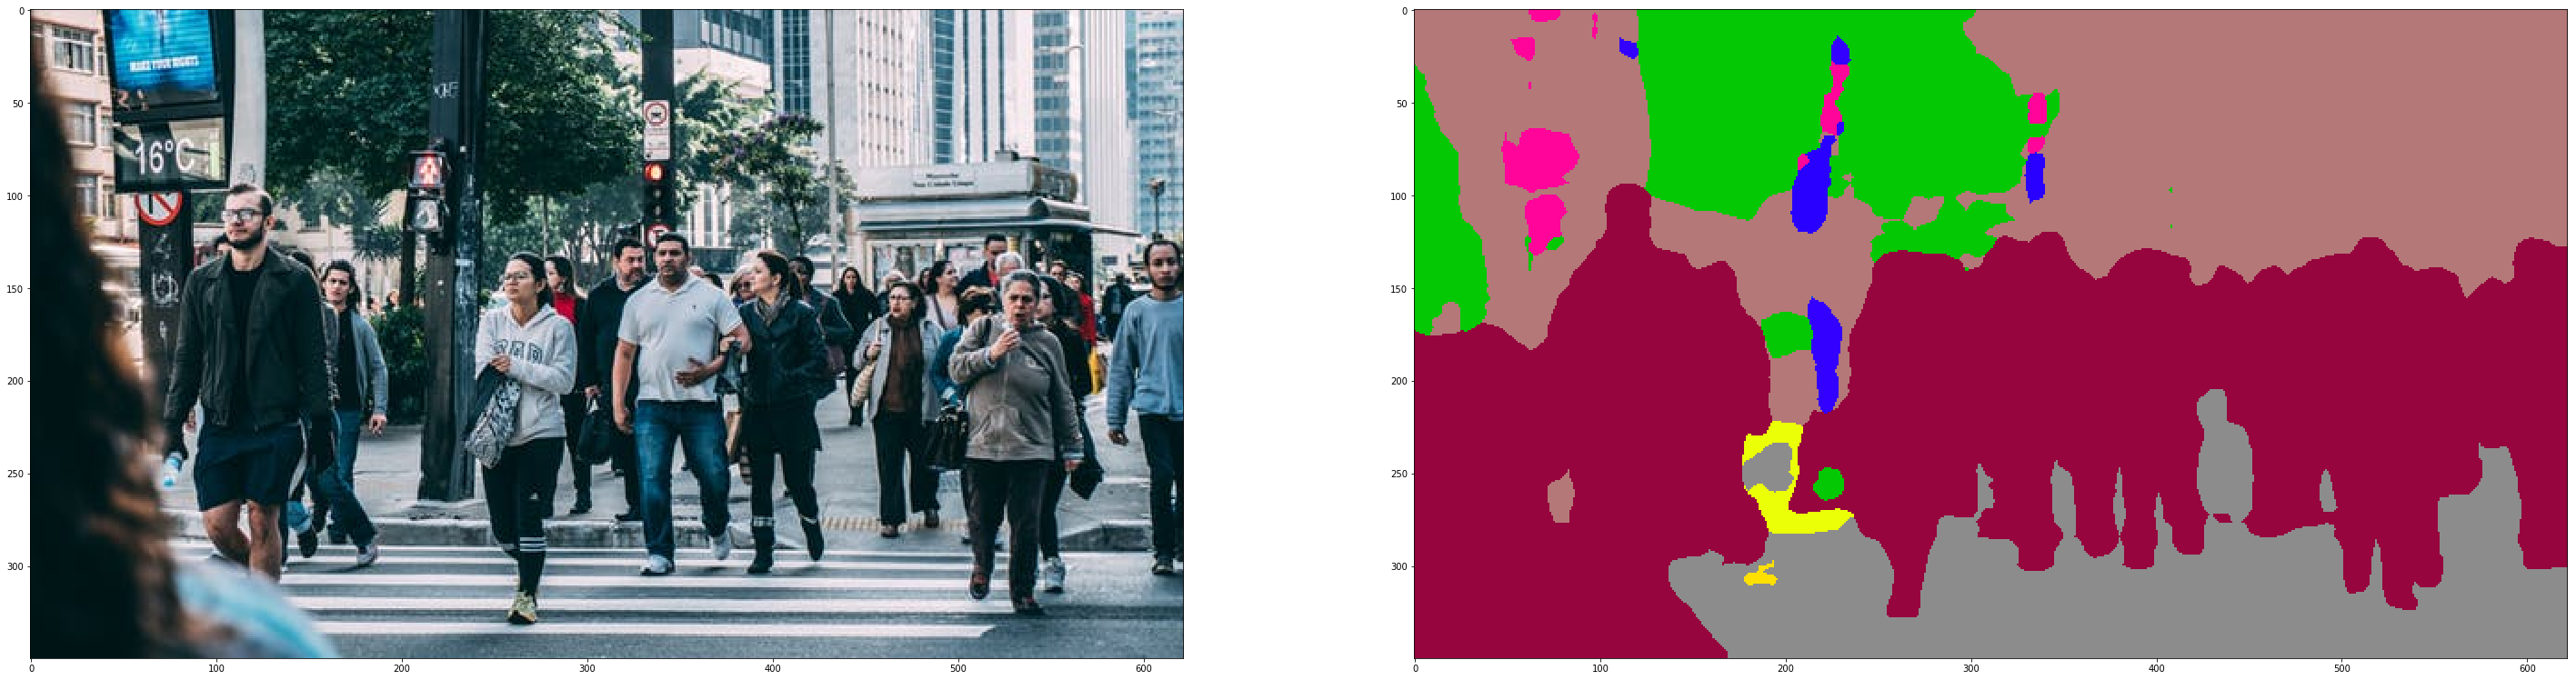

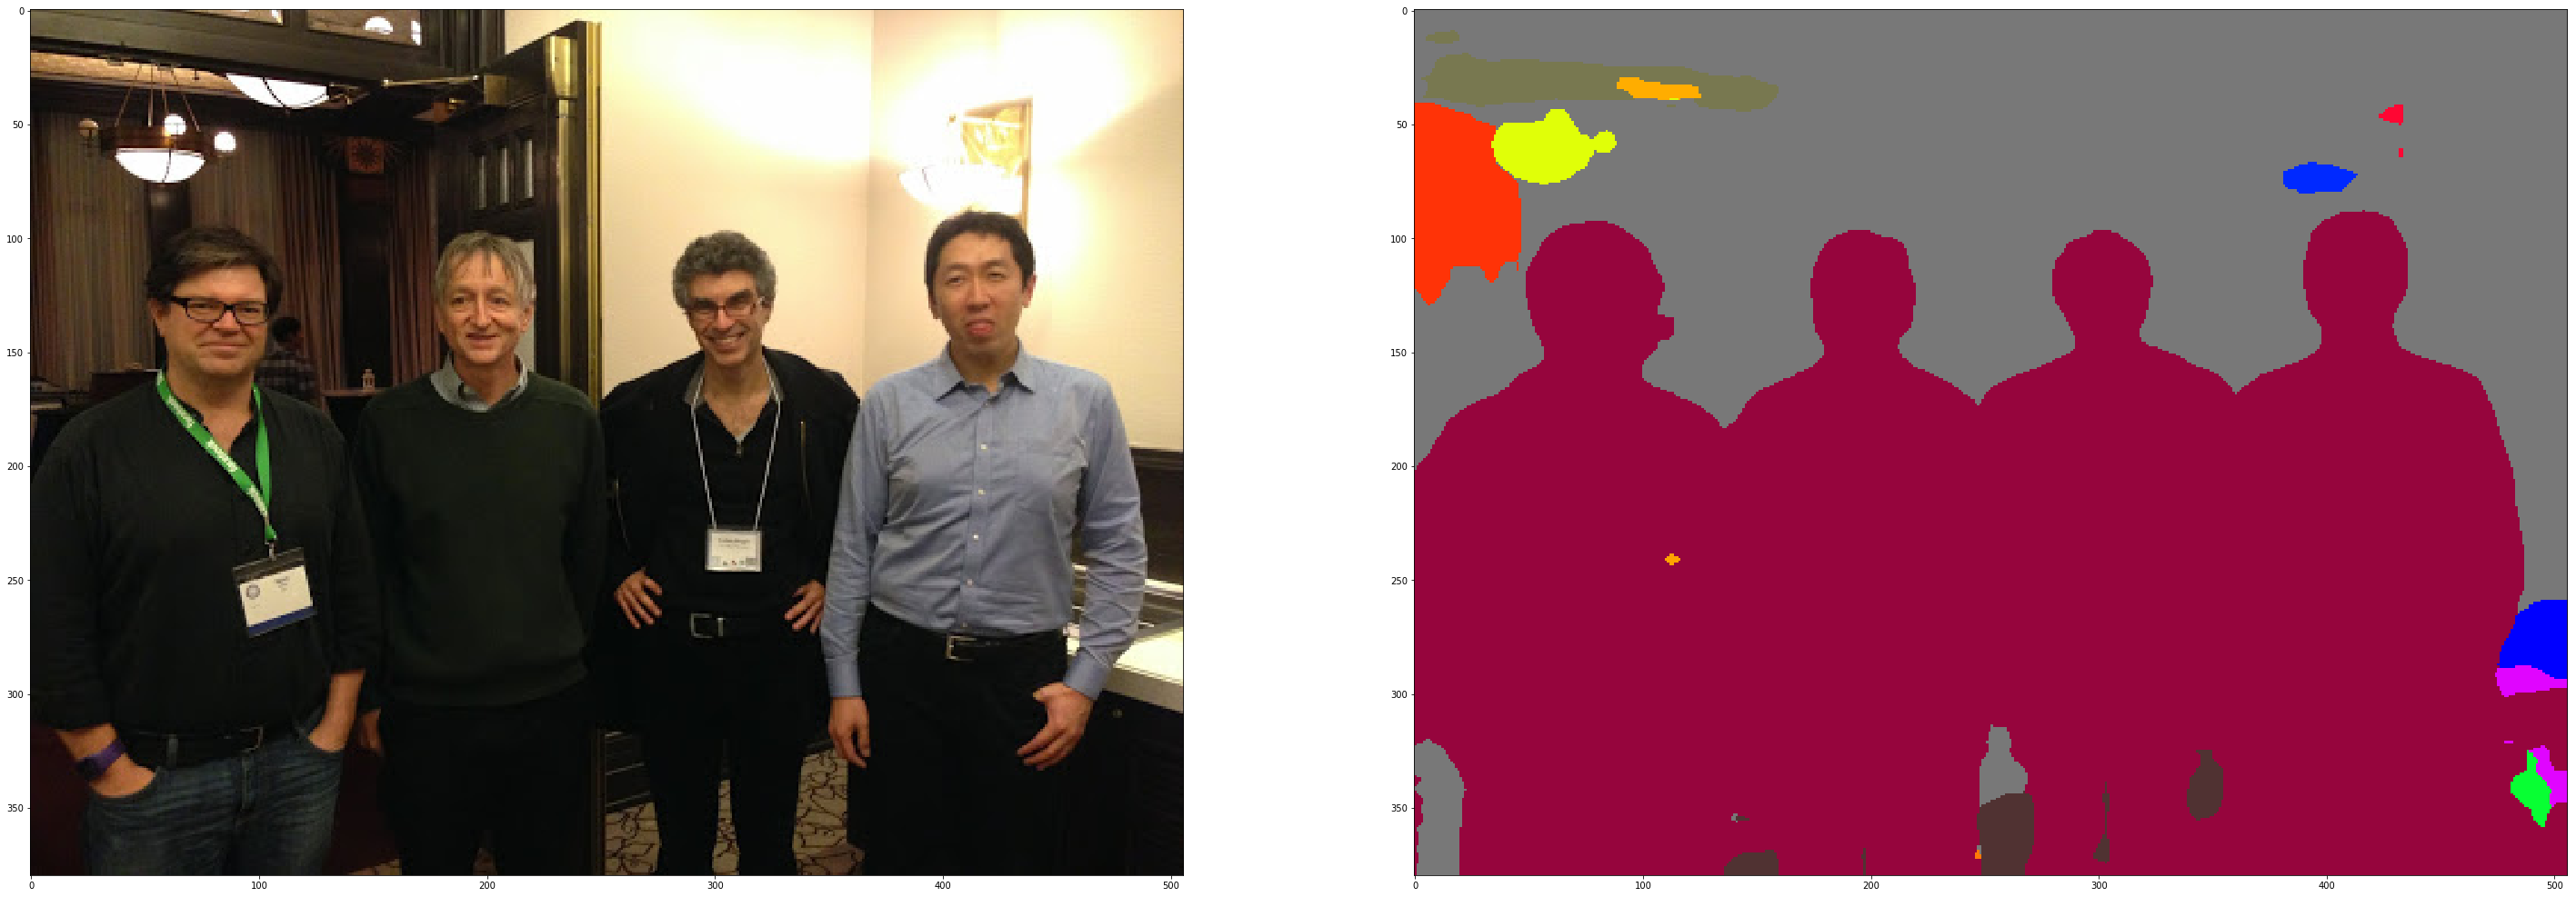

In [8]:
for img_fp in imgs_list:
    plt.figure(figsize=(50, 50))
    image = cv2.imread(img_fp)
    if image is None:
        print('Something wrong with image: {}'.format(img_fp))
        break
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.subplot(1,2,1)
    plt.imshow(image)
    mask = applier.inference(image)
    for obj in mask["objects"]:
        obj.draw(image, color_mapping[obj.class_title])
    plt.subplot(1,2,2)
    plt.imshow(image)
    plt.show()